In this notebook, you will write code to build, compile and fit a neural network model to the MNIST dataset of images of handwritten digits.

#### The MNIST dataset

In this assignment, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

# 1) Import

In [1]:
import tensorflow as tf
# check the version
tf.__version__

'2.9.1'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Load Data

In [4]:
from google.colab import drive
drive.mount('gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# load from csv file
data = np.loadtxt('gdrive/My Drive/Colab Notebooks/DL/mnist.csv', delimiter=',')


X = data[:, 1:]
y = data[:, 0]

In [65]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist_data.load_data()

#Note: If you upload data using this cell, you need to flatten your data in your sequential model.

In [66]:
print("X shape: ", X.shape) 
print("y shape: ", y.shape) 

X shape:  (60000, 784)
y shape:  (60000,)


In [67]:
print("minimum y value: ", min(y))
print("maximum y value: ", max(y))

minimum y value:  0.0
maximum y value:  9.0


In [68]:
# Rescale the image values so that they lie in between 0 and 1.
# Rescale the image values so that they lie in between 0 and 1.
X = X/255.

#Note: If you upload data using tf.keras.datasets.mnist, rescale using:
X_train = X_train / 255.
X_test = X_test / 255.

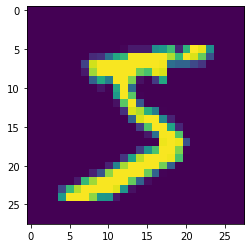

label: [5]


In [69]:
# Display one of the images

i = 0
img = X_train[i, : , :]
plt.imshow(img)
plt.show()
print(f"label: {[y_train[i]]}")

Let's split the data to a 80/20 training/test sets.

In [70]:
# example a 80/20 training/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#we will define validation set later:
#model.fit(X_train, y_train, validation_split=0.25)

In [71]:
print("train X shape: ", X_train.shape) # X_train: numpy array with shape: (num_samples_train, num_features)
print("train y shape: ", y_train.shape) # y_train: numpy array with shape: (num_samples_train,) 
print("test X shape: ", X_test.shape)   # X_test: numpy array with shape: (num_samples_test, num_features)
print("test y shape: ", y_test.shape)   # y_test: numpy array with shape: (num_samples_test,)

train X shape:  (48000, 784)
train y shape:  (48000,)
test X shape:  (12000, 784)
test y shape:  (12000,)


# 3) Build Model

Build a NN model, with one hidden layer, with 32 units, with a relu activation function. The output layer is a multi-class layer with 10 classes (activation function is softmax).

In [72]:
# build the model

model = model = Sequential([
                    Dense(32, activation = 'relu',input_shape=(784,)),
                    Dense(10, activation = 'softmax')
])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


# 4) Start Training (Compile)

Compile the model. Use Adam optimizer and change the learning rate to 0.003. For loss, use 'sparse_categorical_crossentropy' and for metrics use 'SparseCategoricalAccuracy'.

In [74]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
    loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )


In [75]:
X_train.shape

(48000, 784)

In [76]:
y_train.shape

(48000,)

# 5) Model Fit

Fit the model (without leaving out any training data for cross validation). Use 20 epochs. And use batch size of 64. Use verbose=2.

In [77]:
# fit the model

history = model.fit(X_train, y_train, epochs = 20, batch_size = 64, verbose = 2)


Epoch 1/20
750/750 - 2s - loss: 0.3261 - sparse_categorical_accuracy: 0.9046 - 2s/epoch - 3ms/step
Epoch 2/20
750/750 - 3s - loss: 0.1735 - sparse_categorical_accuracy: 0.9483 - 3s/epoch - 3ms/step
Epoch 3/20
750/750 - 2s - loss: 0.1340 - sparse_categorical_accuracy: 0.9597 - 2s/epoch - 3ms/step
Epoch 4/20
750/750 - 1s - loss: 0.1126 - sparse_categorical_accuracy: 0.9662 - 1s/epoch - 2ms/step
Epoch 5/20
750/750 - 1s - loss: 0.0999 - sparse_categorical_accuracy: 0.9697 - 1s/epoch - 2ms/step
Epoch 6/20
750/750 - 2s - loss: 0.0882 - sparse_categorical_accuracy: 0.9728 - 2s/epoch - 2ms/step
Epoch 7/20
750/750 - 1s - loss: 0.0798 - sparse_categorical_accuracy: 0.9751 - 1s/epoch - 2ms/step
Epoch 8/20
750/750 - 1s - loss: 0.0730 - sparse_categorical_accuracy: 0.9767 - 1s/epoch - 2ms/step
Epoch 9/20
750/750 - 1s - loss: 0.0676 - sparse_categorical_accuracy: 0.9784 - 1s/epoch - 2ms/step
Epoch 10/20
750/750 - 1s - loss: 0.0617 - sparse_categorical_accuracy: 0.9809 - 1s/epoch - 2ms/step
Epoch 11/

In [78]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

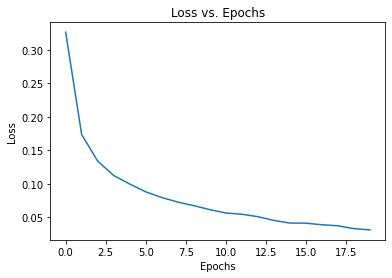

In [79]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'sparse_categorical_accuracy'), Text(0.5, 0, 'Epochs')]

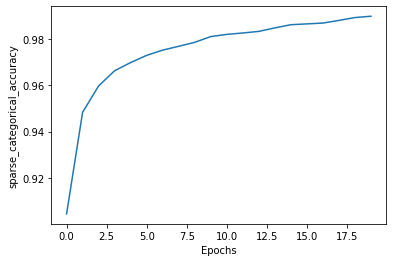

In [80]:
# Make a plot for the accuracy

accuracy_plot = df.plot(y="sparse_categorical_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="sparse_categorical_accuracy")

# 6) Model Evaluate on Test

In [132]:
model.evaluate(X_test, y_test)

375/375 [==============================] - 1s 3ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9698


[0.1159256175160408, 0.9698333144187927]

# 7) Model Predict

In [97]:
X_test.shape[0]

12000

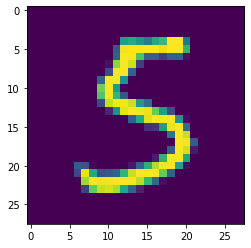

Label: [5.0]


In [133]:
# Choose a random test image

random_inx = np.random.choice(X_test.shape[0])
X_sample = X_test[random_inx,:]
plt.imshow(X_sample.reshape(28,28))
plt.show()
print(f"Label: {[y_test[random_inx]]}")

In [135]:
X_sample.shape

(784,)

In [136]:
X_sample = X_sample.reshape(1,784)
X_sample.shape

(1, 784)

In [137]:
# Get the model predictions

model.predict(X_sample)

array([[2.9599287e-12, 3.9447682e-06, 3.9686250e-09, 1.9392716e-03,
        7.6279934e-11, 9.9803787e-01, 2.2778454e-10, 1.8199445e-13,
        4.7442674e-07, 1.8393954e-05]], dtype=float32)

In [138]:
predictions = model.predict(X_sample)
print(f"Actual y value:{y_test[random_inx]}")
print(f"Model prediction:{np.argmax(predictions)}")

Actual y value:5.0
Model prediction:5


# 8) Model Fit with Validation Sets

Fit the model (with holding 25% of the training data for cross validation).

In [105]:
# fit the model with validation set

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = False, validation_split=0.2)

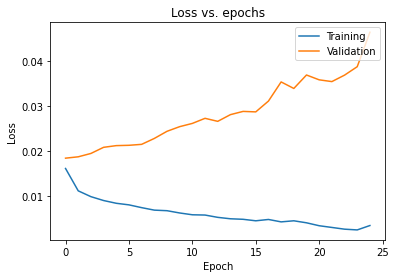

In [106]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Do we have an overfit issue?

In [139]:
#Yes, we have overfit issue as it has better fit for training and worse fit for Validation

# 9) Reduce Overfit - Change the NN Model

In [112]:
# build a shallower model

model = Sequential([
                    Flatten(input_shape = (784,)),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [113]:
# compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
    )

In [114]:
# fit the model with validation set

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = False, validation_split=0.2) 

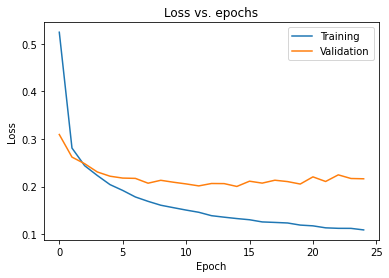

In [115]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

How is the overfitting situation?

In [ ]:
#This is not overfit. The fit is better but not ideal

# 10) Reduce Overfit - L2 Regularization

Use a penalty rate of 0.001.

In [118]:
# build a model 
# add l2 regularizer to your first model

model = Sequential([
                    Flatten(input_shape = (784, )),
                    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)), # penalty rate (or lambda) =0.001
                    Dense(10, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


In [119]:
# compile the model

model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [120]:
# fit the model with validation set

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = False, validation_split=0.2) 

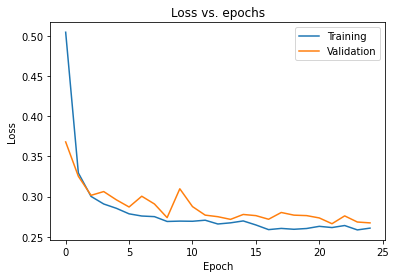

In [121]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

How is the overfitting situation?

In [ ]:
#There is no overfit here. This looks like the ideal fit

# 11) Reduce Overfit - Dropout Regularization

Use a dropout rate of 0.5 for the hidden layer.

In [122]:
#build a model with dropout regularizer

model = Sequential([
                    Flatten(input_shape = (784, )),
                    Dense(64, activation='relu'),
                    Dropout(0.5), #dropout rate 
                    Dense(10, activation = 'softmax')
])
    

In [123]:
# compile the model

model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [124]:
# fit the model with validation set

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = False, validation_split=0.2) 

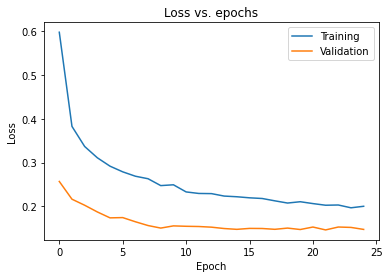

In [125]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

How is the overfitting situation?

In [ ]:
#This is an underfit situation.

# 12) Reduce Overfit - Early Stopping

Set your early stopping to monitor the validation loss. We want an improvment of at least 0.02 at each epoch. Set the patience to 5. 

In [126]:
#set early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5) 

In [127]:
# build the original model without L2 or dropout regularization

model = Sequential([
                   Flatten(input_shape = (784, )),
                   Dense(64, activation = 'relu'),
                   Dense(10, activation = 'softmax')
])

In [128]:
# compile the model

model.compile(
     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
     loss = 'sparse_categorical_crossentropy', # Use this loss function when the y labels are integers. 
     metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] # Use this accuracy when the y labels are integers.
 )

In [129]:
# fit the model with validation set and earlystopping

history = model.fit(X_train, y_train, epochs = 25, batch_size = 256, verbose = 2, validation_split=0.2,
                    callbacks=[early_stopping]) 

Epoch 1/25
150/150 - 1s - loss: 0.3686 - sparse_categorical_accuracy: 0.8950 - val_loss: 0.2188 - val_sparse_categorical_accuracy: 0.9371 - 1s/epoch - 10ms/step
Epoch 2/25
150/150 - 1s - loss: 0.1810 - sparse_categorical_accuracy: 0.9465 - val_loss: 0.1668 - val_sparse_categorical_accuracy: 0.9514 - 1s/epoch - 7ms/step
Epoch 3/25
150/150 - 1s - loss: 0.1299 - sparse_categorical_accuracy: 0.9616 - val_loss: 0.1488 - val_sparse_categorical_accuracy: 0.9563 - 1s/epoch - 8ms/step
Epoch 4/25
150/150 - 1s - loss: 0.1021 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.1240 - val_sparse_categorical_accuracy: 0.9625 - 1s/epoch - 9ms/step
Epoch 5/25
150/150 - 1s - loss: 0.0817 - sparse_categorical_accuracy: 0.9754 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.9664 - 1s/epoch - 8ms/step
Epoch 6/25
150/150 - 1s - loss: 0.0684 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.1211 - val_sparse_categorical_accuracy: 0.9635 - 823ms/epoch - 5ms/step
Epoch 7/25
150/150 - 1s - loss: 0.05

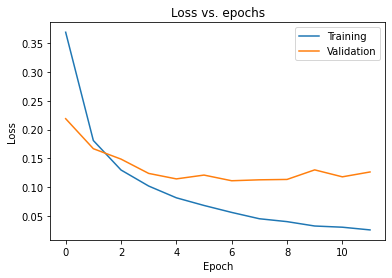

In [130]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

How is the overfitting situation?

In [ ]:
#Duing the first iteration, it was better but there is overfit later.